In [1]:
import pandas as pd

In [2]:
df_movies = pd.read_csv(r"C:\Users\brojo\OneDrive\Desktop\Winter 2025\IS 455\Data sets\movies.csv")
df_triple = pd.read_csv(r"C:\Users\brojo\OneDrive\Desktop\Winter 2025\IS 455\Data sets\ratings.csv")

display(df_movies.head())
display(df_triple.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<Axes: xlabel='rating', ylabel='Count'>

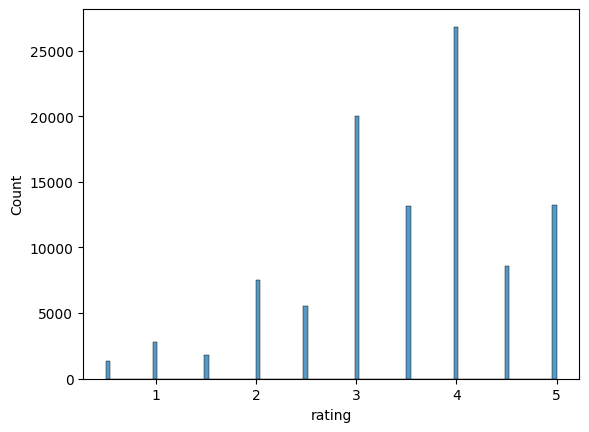

In [3]:
import seaborn as sns
import matplotlib as plt

sns.histplot(data=df_triple, x="rating")

In [4]:
print(f"Number of ratings: {df_triple.shape[0]}")
print(f"Number of movies: {df_triple.movieId.nunique()}")
print(f"Number of consumers: {df_triple.userId.nunique()}")

Number of ratings: 100836
Number of movies: 9724
Number of consumers: 610


In [5]:
df_triple.movieId.value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
135534      1
Name: count, Length: 9724, dtype: int64

In [6]:
value_counts = df_triple.movieId.value_counts()
keep_list =value_counts[value_counts >= 9]
df_triple = df_triple.loc[df_triple['movieId'].isin(keep_list.index)]
print(keep_list)

movieId
356      329
318      317
296      307
593      279
2571     278
        ... 
46948      9
1280       9
5247       9
4732       9
3071       9
Name: count, Length: 2441, dtype: int64


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix 

#count the number of users and items
U = df_triple['userId'].nunique()
I = df_triple['movieId'].nunique()

#Mapping the actual user and utem IDs to their position in the matrix
user_mapper = dict(zip(np.unique(df_triple['userId']), list(range(U))))
movie_mapper = dict(zip(np.unique(df_triple['movieId']), list(range(I))))

# reverse the mapping for later use in recommendation
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['userId'])))
movie_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['movieId'])))

#creates a list of IDs for every rating in the dataset
user_index = [user_mapper[i] for i in df_triple['userId']]
movie_index = [movie_mapper[i] for i in df_triple['movieId']]

X = csr_matrix((df_triple['rating'], (movie_index, user_index)), shape=(I, U))

print(X)
# this saves data because there is only data stored where there is an entry
# a pandas df would use space for an empty value 



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 82664 stored elements and shape (2441, 610)>
  Coords	Values
  (0, 0)	4.0
  (0, 4)	4.0
  (0, 6)	4.5
  (0, 14)	2.5
  (0, 16)	4.5
  (0, 17)	3.5
  (0, 18)	4.0
  (0, 20)	3.5
  (0, 26)	3.0
  (0, 30)	5.0
  (0, 31)	3.0
  (0, 32)	3.0
  (0, 39)	5.0
  (0, 42)	5.0
  (0, 43)	3.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	3.0
  (0, 53)	3.0
  (0, 56)	5.0
  (0, 62)	5.0
  (0, 63)	4.0
  (0, 65)	4.0
  (0, 67)	2.5
  (0, 70)	5.0
  :	:
  (2438, 600)	4.5
  (2439, 61)	3.5
  (2439, 97)	3.0
  (2439, 152)	0.5
  (2439, 209)	4.5
  (2439, 248)	4.5
  (2439, 379)	0.5
  (2439, 413)	4.5
  (2439, 513)	2.0
  (2439, 514)	4.0
  (2439, 566)	2.0
  (2439, 585)	5.0
  (2439, 595)	3.5
  (2440, 24)	5.0
  (2440, 61)	4.0
  (2440, 97)	5.0
  (2440, 232)	2.5
  (2440, 247)	4.5
  (2440, 248)	5.0
  (2440, 304)	5.0
  (2440, 330)	4.0
  (2440, 337)	1.0
  (2440, 379)	3.0
  (2440, 513)	3.5
  (2440, 585)	4.0


In [8]:
def create_matrix(df, user, item, rating):
        # function for what we just did manually
        import numpy as np
        from scipy.sparse import csr_matrix
        
        U = df[user].nunique()  # Number of users for the matrix
        I = df[item].nunique()  # Number of items for the matrix
        
        # Map user and movie IDs to matrix indices
        user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
        item_mapper = dict(zip(np.unique(df[item]), list(range(I))))
       
        # Map matrix indices back to IDs
        user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
        item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))
        
        # Create a list of index values for the csr_matrix for users and movies
        user_index = [user_mapper[i] for i in df[user]]
        item_index = [item_mapper[i] for i in df[item]]
        
        # Build the final matrix which will look like: (movieId, userId) rating
        X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))
        
        return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [9]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'userId', 'movieId', 'rating')


In [25]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
        from sklearn.neighbors import NearestNeighbors
        
        rec_ids = []                # Make a list for the recommended item IDs we'll get later
        item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
        item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
        
        # Fit the clustering algorithm based on the user-item matrix X
        knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
        
        # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
        rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
        rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
        rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
        rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
        
        # We need to replace the recommended item indeces with their original item IDs
        for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
          rec_ids.append(item_inv_mapper[rec_indeces[i]])
          
        # It may help to see what this is. The distance list is first and the recommended item indeces are second
        if messages:
          print(f'List of recommended item indeces:\n{rec_indeces}\n')
          print(f'List of recommended item IDs:\n{rec_ids}\n')
          print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
        
        # Return two lists: the original item IDs of the recommendations and their similarity scores
        return rec_ids, rec_distances


movie_id = 780
rec_ids, rec_distances = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

print(f"If you like {df_movies.loc[movie_id, 'title']}, you may also enjoy:\n")

print(f"\t{df_movies.loc[rec_ids, 'title']}")

List of recommended item indeces:
[336 304 238 324 498 285 135   0 323  27 523]

List of recommended item IDs:
[np.int64(648), np.int64(480), np.int64(736), np.int64(1210), np.int64(589), np.int64(260), np.int64(1), np.int64(733), np.int64(32), np.int64(1240)]

List of recommended item similarity to selected item:
[0.32264587 0.36158178 0.37938197 0.4111467  0.41158592 0.41554958
 0.43573831 0.43891484 0.44044693 0.46318205]

If you like Cinderella (1950), you may also enjoy:

	648                   Chain Reaction (1996)
480                Terminal Velocity (1994)
736                   Penny Serenade (1941)
1210           187 (One Eight Seven) (1997)
589                       Last Dance (1996)
260                        Quiz Show (1994)
1                            Jumanji (1995)
733            It's a Wonderful Life (1946)
32                              Babe (1995)
1240    Fast, Cheap & Out of Control (1997)
Name: title, dtype: object


In [14]:
import joblib
joblib.dump(similar_ids, "recommend.sav")

['recommend.sav']

List of recommended item indeces:
[  11 6017 4279 4356 5618 7363 6964 7778 2621 1236  534]

List of recommended item IDs:
[np.int64(39400), np.int64(6263), np.int64(6379), np.int64(27311), np.int64(79274), np.int64(66783), np.int64(92048), np.int64(3511), np.int64(1646), np.int64(631)]

List of recommended item similarity to selected item:
[0.43232772 0.46635988 0.51280566 0.53531352 0.53786297 0.55098674
 0.55126712 0.55456089 0.55652832 0.55822937]

If you like Balto (1995), you may also enjoy:



KeyError: '[39400, 27311, 79274, 66783, 92048] not in index'

In [38]:
user_id = 150
k = 20

df_user_rating = df_triple[(df_triple["userId"]  == user_id) & (df_triple['rating'] >= 4)]
df_user_rating.sort_values(by=['rating'], ascending=False)

df_results = pd.DataFrame(columns=['distance'])

for row in df_user_rating.itertuples():
    rec_ids, rec_distances = recommend(row.movieId, X, item_mapper, item_inv_mapper, k=k, messages=False)
    for j, i in enumerate(rec_ids):
        df_results.loc[i] = rec_distances[j]

df_results.sort_values(by=['distance'])

# df_movies.set_index('movieId', inplace=True)
for row in df_results.head(10).itertuples():
    print(df_movies.loc[row[0], 'title'])

Rock, The (1996)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Casino (1995)
Fargo (1996)
Fugitive, The (1993)
Seven (a.k.a. Se7en) (1995)
Broken Arrow (1996)
Desperado (1995)
Independence Day (a.k.a. ID4) (1996)


In [49]:
k = 5

df_recommendations = pd.DataFrame(columns=['title'], index=item_mapper)
for i in range(1, k+1):
    df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
    rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)
    df_recommendations.at[row[0], 'title'] = df_movies.at[row[0], 'title']

    for i, r in enumerate(rec_ids):
        df_recommendations.at[row[0], f"Recommendation {i + 1}"] = df_movies.at[r, 'title']


df_recommendations

,title,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
1,Toy Story (1995),Toy Story 2 (1999),Jurassic Park (1993),Independence Day (a.k.a. ID4) (1996),Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994)
2,Jumanji (1995),"Lion King, The (1994)",Mrs. Doubtfire (1993),"Mask, The (1994)",Jurassic Park (1993),Home Alone (1990)
3,Grumpier Old Men (1995),Grumpy Old Men (1993),Striptease (1996),"Nutty Professor, The (1996)",Twister (1996),Father of the Bride Part II (1995)
5,Father of the Bride Part II (1995),Sabrina (1995),"Juror, The (1996)",Striptease (1996),Mr. Holland's Opus (1995),Grumpier Old Men (1995)
6,Heat (1995),"Rock, The (1996)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Léon: The Professional (a.k.a. The Professiona...,Casino (1995),Fargo (1996)
...,...,...,...,...,...,...
175303,It (2017),Prisoners (2013),We're the Millers (2013),The Hateful Eight (2015),Now You See Me (2013),Pitch Perfect (2012)
176371,Blade Runner 2049 (2017),Dunkirk (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),Wonder Woman (2017),Baby Driver (2017)
177765,Coco (2017),Guardians of the Galaxy 2 (2017),Thor: Ragnarok (2017),Ratatouille (2007),Star Wars: The Last Jedi (2017),Deadpool 2 (2018)
179819,Star Wars: The Last Jedi (2017),Untitled Spider-Man Reboot (2017),Black Panther (2017),Thor: Ragnarok (2017),Guardians of the Galaxy 2 (2017),X-Men: Apocalypse (2016)
